# ทดลองปรับค่าTOA_SNR_cappi

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyart


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



<frozen importlib._bootstrap>:283: DeprecationWarning: the load_module() method is deprecated and slated for removal in Python 3.12; use exec_module() instead


In [2]:
file = "../1data/0radar/1radar_tmd/PHS240@201807201000.uf.bz2"
radar = pyart.io.read(file)
print(radar.fields.keys())

dict_keys(['reflectivity', 'velocity', 'spectrum_width', 'corrected_reflectivity', 'corrected_differential_reflectivity', 'differential_phase', 'cross_correlation_ratio'])


## TOA no_TOA, 5000, 10000, 15000,20000, 25000

In [3]:
snr = pyart.retrieve.calculate_snr_from_reflectivity(radar, refl_field='reflectivity',toa=5000.0) 
radar.add_field('signal_to_noise_ratio_5k', snr, replace_existing=True)
snr = pyart.retrieve.calculate_snr_from_reflectivity(radar, refl_field='reflectivity',toa=10000.0) 
radar.add_field('signal_to_noise_ratio_10k', snr, replace_existing=True)
snr = pyart.retrieve.calculate_snr_from_reflectivity(radar, refl_field='reflectivity',toa=15000.0) 
radar.add_field('signal_to_noise_ratio_15k', snr, replace_existing=True)
snr = pyart.retrieve.calculate_snr_from_reflectivity(radar, refl_field='reflectivity',toa=16000.0) 
radar.add_field('signal_to_noise_ratio_16k', snr, replace_existing=True)
snr = pyart.retrieve.calculate_snr_from_reflectivity(radar, refl_field='reflectivity',toa=17000.0) 
radar.add_field('signal_to_noise_ratio_17k', snr, replace_existing=True)
print(radar.fields.keys())

dict_keys(['reflectivity', 'velocity', 'spectrum_width', 'corrected_reflectivity', 'corrected_differential_reflectivity', 'differential_phase', 'cross_correlation_ratio', 'signal_to_noise_ratio_5k', 'signal_to_noise_ratio_10k', 'signal_to_noise_ratio_15k', 'signal_to_noise_ratio_16k', 'signal_to_noise_ratio_17k'])


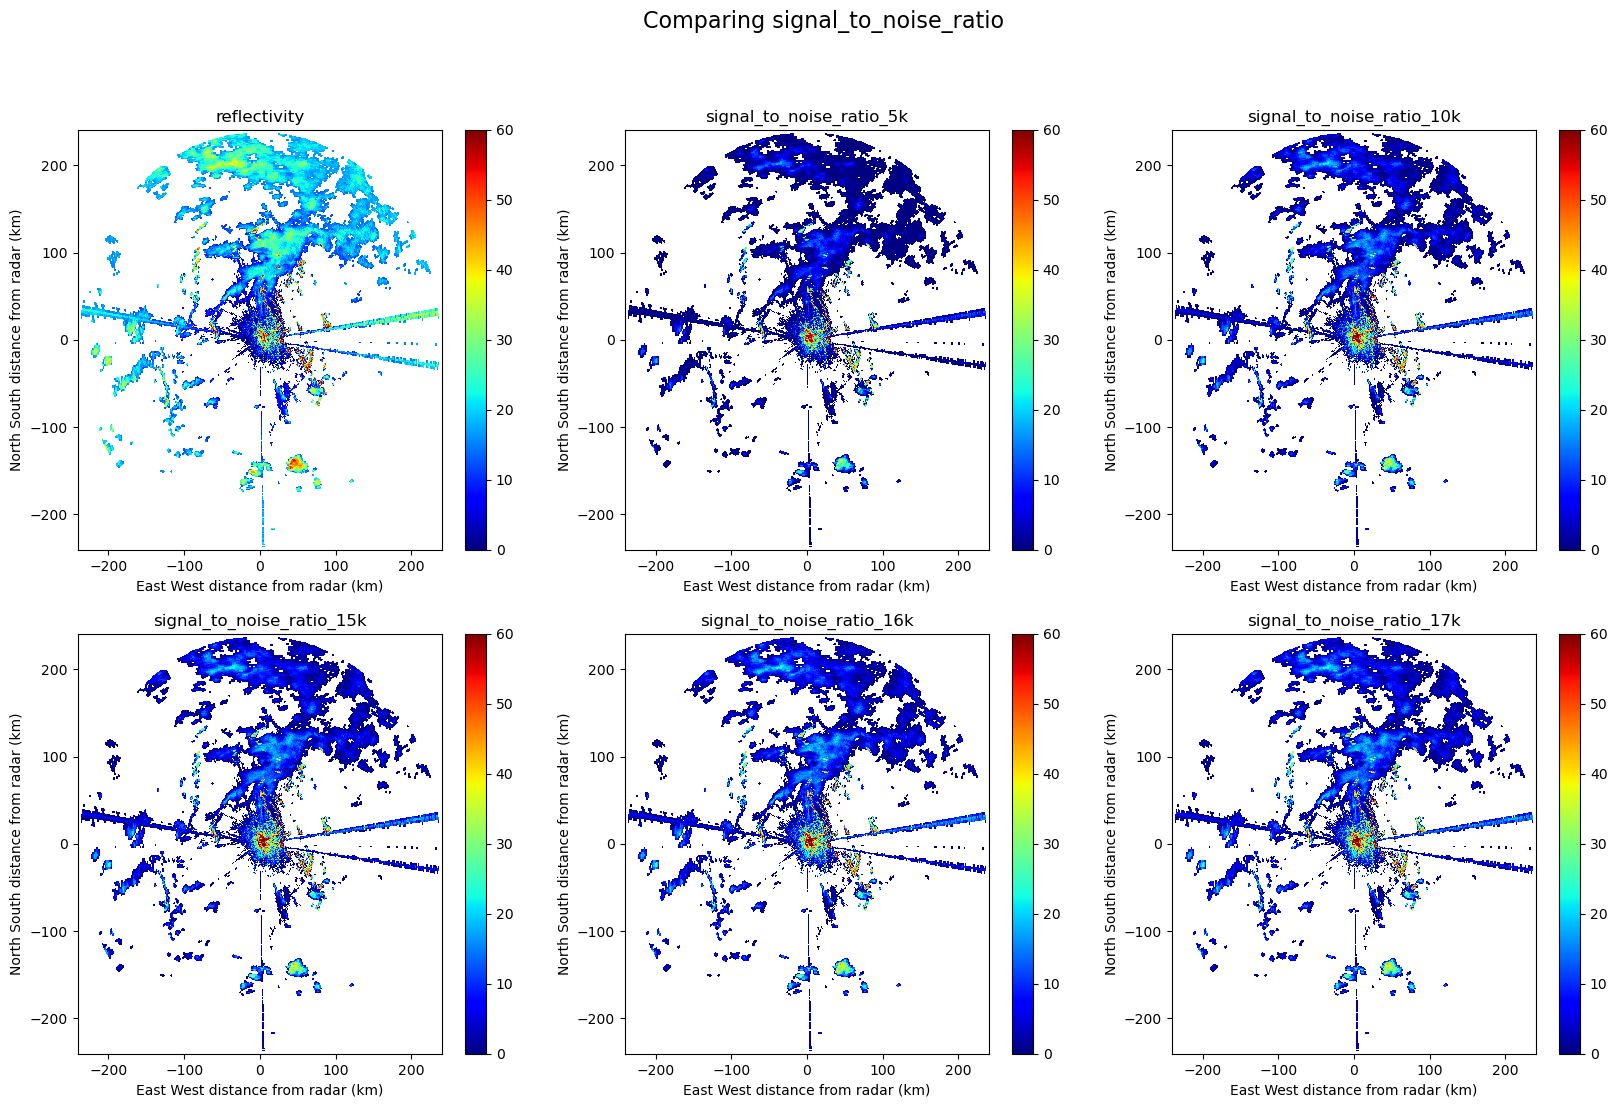

In [26]:
# create the plot
fig = plt.figure(figsize=(20, 12))
ax1 = fig.add_subplot(231)
display = pyart.graph.RadarDisplay(radar)
display.plot_ppi('reflectivity', 0, ax=ax1, vmin=0, vmax=60., 
                 colorbar_label='', cmap='jet',
                 title='reflectivity')
             
ax2 = fig.add_subplot(232)
display = pyart.graph.RadarDisplay(radar)
display.plot_ppi('signal_to_noise_ratio_5k', 0, ax=ax2, vmin=0, vmax=60., 
                 colorbar_label='', cmap='jet',
                 title='signal_to_noise_ratio_5k')

ax3 = fig.add_subplot(233)
display = pyart.graph.RadarDisplay(radar)
display.plot_ppi('signal_to_noise_ratio_10k', 0, ax=ax3, vmin=0, vmax=60., 
                 colorbar_label='', cmap='jet',
                 title='signal_to_noise_ratio_10k')

ax4 = fig.add_subplot(234)
display = pyart.graph.RadarDisplay(radar)
display.plot_ppi('signal_to_noise_ratio_15k', 0, ax=ax4, vmin=0, vmax=60., 
                 colorbar_label='', cmap='jet',
                 title='signal_to_noise_ratio_15k')
             
ax5 = fig.add_subplot(235)
display = pyart.graph.RadarDisplay(radar)
display.plot_ppi('signal_to_noise_ratio_16k', 0, ax=ax5, vmin=0, vmax=60., 
                 colorbar_label='', cmap='jet',
                 title='signal_to_noise_ratio_16k')

ax6 = fig.add_subplot(236)
display = pyart.graph.RadarDisplay(radar)
display.plot_ppi('signal_to_noise_ratio_17k', 0, ax=ax6, vmin=0, vmax=60., 
                 colorbar_label='', cmap='jet',
                 title='signal_to_noise_ratio_17k')

plt.suptitle('Comparing signal_to_noise_ratio ', fontsize=16)
plt.show()

### ทดสอบ TOA กับ SNR
#### GateFilter below
* TOA5K vs SNR GateFilter below [1,2,3,4,5]

#### GateFilter above
* TOA5K vs SNR GateFilter below [10,20,30,40,50]

#### GateFilter below + above
* TOA5K vs SNR GateFilter below [1,2,3,4,5] x [10,20,30,40,50]


In [5]:
gtfilter = pyart.filters.moment_and_texture_based_gate_filter(radar, phi_field='differential_phase')
gtfilter.exclude_below('signal_to_noise_ratio_5k', 1) #ใช้ค่า snr  = 10 
#gtfilter.exclude_above('signal_to_noise_ratio', 70) #ใช้ค่า snr  = 60 
radar.add_field_like('reflectivity', 'reflectivity_copy',
                     radar.fields['reflectivity']['data'].copy())
nf = radar.fields['reflectivity_copy']
nf['data'] = np.ma.masked_where(gtfilter.gate_excluded , nf['data'])
radar.add_field('filtered_snr_toa5k_reflectivity_SNR1dB', nf, replace_existing=True)
print(radar.fields.keys())

dict_keys(['reflectivity', 'velocity', 'spectrum_width', 'corrected_reflectivity', 'corrected_differential_reflectivity', 'differential_phase', 'cross_correlation_ratio', 'signal_to_noise_ratio_5k', 'signal_to_noise_ratio_10k', 'signal_to_noise_ratio_15k', 'signal_to_noise_ratio_16k', 'signal_to_noise_ratio_17k', 'reflectivity_copy', 'filtered_snr_toa5k_reflectivity_SNR1dB'])


In [6]:
gtfilter = pyart.filters.moment_and_texture_based_gate_filter(radar, phi_field='differential_phase')
gtfilter.exclude_below('signal_to_noise_ratio_5k', 2) #ใช้ค่า snr  = 10 
#gtfilter.exclude_above('signal_to_noise_ratio', 70) #ใช้ค่า snr  = 60 
radar.add_field_like('reflectivity', 'reflectivity_copy2dB',
                     radar.fields['reflectivity']['data'].copy())
nf = radar.fields['reflectivity_copy2dB']
nf['data'] = np.ma.masked_where(gtfilter.gate_excluded , nf['data'])
radar.add_field('filtered_snr_toa5k_reflectivity_SNR2dB', nf, replace_existing=True)
print(radar.fields.keys())

dict_keys(['reflectivity', 'velocity', 'spectrum_width', 'corrected_reflectivity', 'corrected_differential_reflectivity', 'differential_phase', 'cross_correlation_ratio', 'signal_to_noise_ratio_5k', 'signal_to_noise_ratio_10k', 'signal_to_noise_ratio_15k', 'signal_to_noise_ratio_16k', 'signal_to_noise_ratio_17k', 'reflectivity_copy', 'filtered_snr_toa5k_reflectivity_SNR1dB', 'reflectivity_copy2dB', 'filtered_snr_toa5k_reflectivity_SNR2dB'])


In [7]:
gtfilter = pyart.filters.moment_and_texture_based_gate_filter(radar, phi_field='differential_phase')
gtfilter.exclude_below('signal_to_noise_ratio_5k', 3) #ใช้ค่า snr  = 10 
#gtfilter.exclude_above('signal_to_noise_ratio', 70) #ใช้ค่า snr  = 60 
radar.add_field_like('reflectivity', 'reflectivity_copy3dB',
                     radar.fields['reflectivity']['data'].copy())
nf = radar.fields['reflectivity_copy3dB']
nf['data'] = np.ma.masked_where(gtfilter.gate_excluded , nf['data'])
radar.add_field('filtered_snr_toa5k_reflectivity_SNR3dB', nf, replace_existing=True)
print(radar.fields.keys())

dict_keys(['reflectivity', 'velocity', 'spectrum_width', 'corrected_reflectivity', 'corrected_differential_reflectivity', 'differential_phase', 'cross_correlation_ratio', 'signal_to_noise_ratio_5k', 'signal_to_noise_ratio_10k', 'signal_to_noise_ratio_15k', 'signal_to_noise_ratio_16k', 'signal_to_noise_ratio_17k', 'reflectivity_copy', 'filtered_snr_toa5k_reflectivity_SNR1dB', 'reflectivity_copy2dB', 'filtered_snr_toa5k_reflectivity_SNR2dB', 'reflectivity_copy3dB', 'filtered_snr_toa5k_reflectivity_SNR3dB'])


In [8]:
gtfilter = pyart.filters.moment_and_texture_based_gate_filter(radar, phi_field='differential_phase')
gtfilter.exclude_below('signal_to_noise_ratio_5k', 4) #ใช้ค่า snr  = 10 
#gtfilter.exclude_above('signal_to_noise_ratio', 70) #ใช้ค่า snr  = 60 
radar.add_field_like('reflectivity', 'reflectivity_copy4dB',
                     radar.fields['reflectivity']['data'].copy())
nf = radar.fields['reflectivity_copy4dB']
nf['data'] = np.ma.masked_where(gtfilter.gate_excluded , nf['data'])
radar.add_field('filtered_snr_toa5k_reflectivity_SNR4dB', nf, replace_existing=True)
print(radar.fields.keys())

dict_keys(['reflectivity', 'velocity', 'spectrum_width', 'corrected_reflectivity', 'corrected_differential_reflectivity', 'differential_phase', 'cross_correlation_ratio', 'signal_to_noise_ratio_5k', 'signal_to_noise_ratio_10k', 'signal_to_noise_ratio_15k', 'signal_to_noise_ratio_16k', 'signal_to_noise_ratio_17k', 'reflectivity_copy', 'filtered_snr_toa5k_reflectivity_SNR1dB', 'reflectivity_copy2dB', 'filtered_snr_toa5k_reflectivity_SNR2dB', 'reflectivity_copy3dB', 'filtered_snr_toa5k_reflectivity_SNR3dB', 'reflectivity_copy4dB', 'filtered_snr_toa5k_reflectivity_SNR4dB'])


In [9]:
gtfilter = pyart.filters.moment_and_texture_based_gate_filter(radar, phi_field='differential_phase')
gtfilter.exclude_below('signal_to_noise_ratio_5k', 5) #ใช้ค่า snr  = 10 
#gtfilter.exclude_above('signal_to_noise_ratio', 70) #ใช้ค่า snr  = 60 
radar.add_field_like('reflectivity', 'reflectivity_copy5dB',
                     radar.fields['reflectivity']['data'].copy())
nf = radar.fields['reflectivity_copy5dB']
nf['data'] = np.ma.masked_where(gtfilter.gate_excluded , nf['data'])
radar.add_field('filtered_snr_toa5k_reflectivity_SNR5dB', nf, replace_existing=True)
print(radar.fields.keys())

dict_keys(['reflectivity', 'velocity', 'spectrum_width', 'corrected_reflectivity', 'corrected_differential_reflectivity', 'differential_phase', 'cross_correlation_ratio', 'signal_to_noise_ratio_5k', 'signal_to_noise_ratio_10k', 'signal_to_noise_ratio_15k', 'signal_to_noise_ratio_16k', 'signal_to_noise_ratio_17k', 'reflectivity_copy', 'filtered_snr_toa5k_reflectivity_SNR1dB', 'reflectivity_copy2dB', 'filtered_snr_toa5k_reflectivity_SNR2dB', 'reflectivity_copy3dB', 'filtered_snr_toa5k_reflectivity_SNR3dB', 'reflectivity_copy4dB', 'filtered_snr_toa5k_reflectivity_SNR4dB', 'reflectivity_copy5dB', 'filtered_snr_toa5k_reflectivity_SNR5dB'])


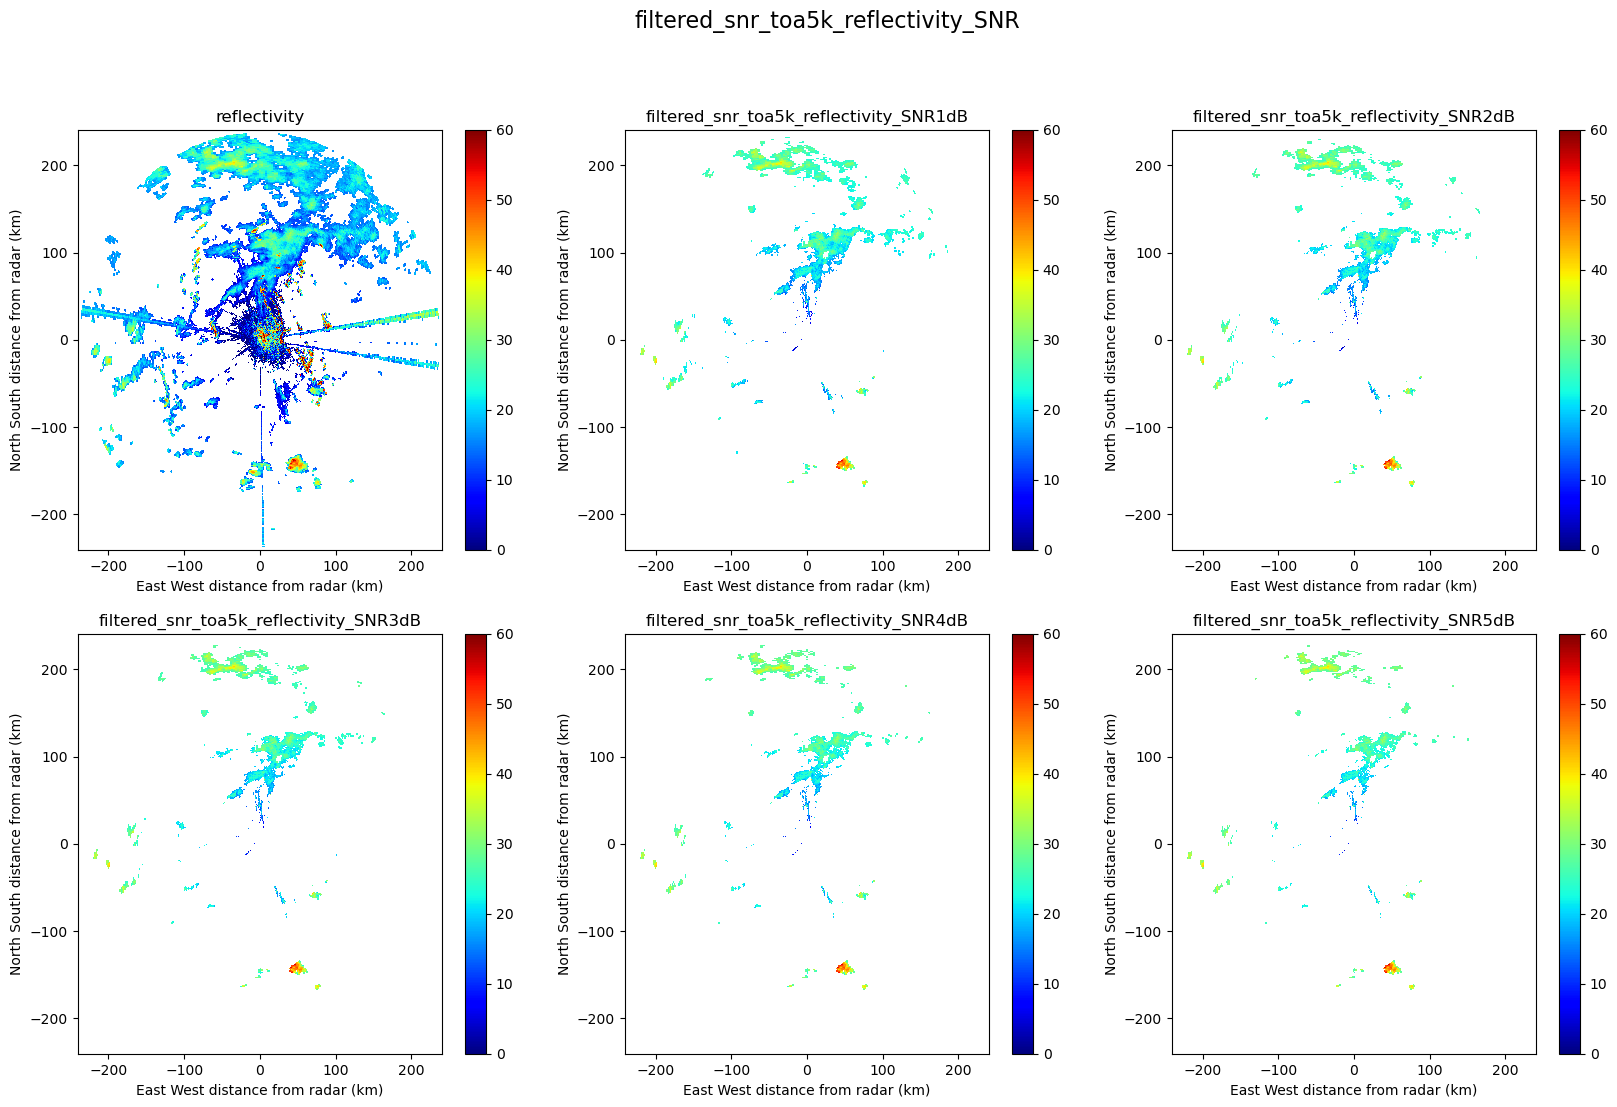

In [25]:
# create the plot
fig = plt.figure(figsize=(20, 12))
ax1 = fig.add_subplot(231)
display = pyart.graph.RadarDisplay(radar)
display.plot_ppi('reflectivity', 0, ax=ax1, vmin=0, vmax=60., 
                 colorbar_label='', cmap='jet',
                 title='reflectivity')
             
ax2 = fig.add_subplot(232)
display = pyart.graph.RadarDisplay(radar)
display.plot_ppi('filtered_snr_toa5k_reflectivity_SNR1dB', 0, ax=ax2, vmin=0, vmax=60., 
                 colorbar_label='', cmap='jet',
                 title='filtered_snr_toa5k_reflectivity_SNR1dB')

ax3 = fig.add_subplot(233)
display = pyart.graph.RadarDisplay(radar)
display.plot_ppi('filtered_snr_toa5k_reflectivity_SNR2dB', 0, ax=ax3, vmin=0, vmax=60., 
                 colorbar_label='', cmap='jet',
                 title='filtered_snr_toa5k_reflectivity_SNR2dB')

ax4 = fig.add_subplot(234)
display = pyart.graph.RadarDisplay(radar)
display.plot_ppi('filtered_snr_toa5k_reflectivity_SNR3dB', 0, ax=ax4, vmin=0, vmax=60., 
                 colorbar_label='', cmap='jet',
                 title='filtered_snr_toa5k_reflectivity_SNR3dB')
             
ax5 = fig.add_subplot(235)
display = pyart.graph.RadarDisplay(radar)
display.plot_ppi('filtered_snr_toa5k_reflectivity_SNR4dB', 0, ax=ax5, vmin=0, vmax=60., 
                 colorbar_label='', cmap='jet',
                 title='filtered_snr_toa5k_reflectivity_SNR4dB')

ax6 = fig.add_subplot(236)
display = pyart.graph.RadarDisplay(radar)
display.plot_ppi('filtered_snr_toa5k_reflectivity_SNR5dB', 0, ax=ax6, vmin=0, vmax=60., 
                 colorbar_label='', cmap='jet',
                 title='filtered_snr_toa5k_reflectivity_SNR5dB')

plt.suptitle('filtered_snr_toa5k_reflectivity_SNR', fontsize=16)
plt.show()

### TOA แต่ละระดับ กับ gatefilter 1 dB
* TOA5k,10k,15 กับ gatefilter 1 dB

In [11]:
gtfilter = pyart.filters.moment_and_texture_based_gate_filter(radar, phi_field='differential_phase')
gtfilter.exclude_below('signal_to_noise_ratio_10k', 1) #ใช้ค่า snr  = 10 
#gtfilter.exclude_above('signal_to_noise_ratio', 70) #ใช้ค่า snr  = 60 
radar.add_field_like('reflectivity', 'reflectivity_copy_10k1dB',
                     radar.fields['reflectivity']['data'].copy())
nf = radar.fields['reflectivity_copy_10k1dB']
nf['data'] = np.ma.masked_where(gtfilter.gate_excluded , nf['data'])
radar.add_field('filtered_snr_toa10k_reflectivity_SNR1dB', nf, replace_existing=True)
print(radar.fields.keys())

dict_keys(['reflectivity', 'velocity', 'spectrum_width', 'corrected_reflectivity', 'corrected_differential_reflectivity', 'differential_phase', 'cross_correlation_ratio', 'signal_to_noise_ratio_5k', 'signal_to_noise_ratio_10k', 'signal_to_noise_ratio_15k', 'signal_to_noise_ratio_16k', 'signal_to_noise_ratio_17k', 'reflectivity_copy', 'filtered_snr_toa5k_reflectivity_SNR1dB', 'reflectivity_copy2dB', 'filtered_snr_toa5k_reflectivity_SNR2dB', 'reflectivity_copy3dB', 'filtered_snr_toa5k_reflectivity_SNR3dB', 'reflectivity_copy4dB', 'filtered_snr_toa5k_reflectivity_SNR4dB', 'reflectivity_copy5dB', 'filtered_snr_toa5k_reflectivity_SNR5dB', 'reflectivity_copy_10k1dB', 'filtered_snr_toa10k_reflectivity_SNR1dB'])


In [12]:
gtfilter = pyart.filters.moment_and_texture_based_gate_filter(radar, phi_field='differential_phase')
gtfilter.exclude_below('signal_to_noise_ratio_15k', 1) #ใช้ค่า snr  = 10 
#gtfilter.exclude_above('signal_to_noise_ratio', 70) #ใช้ค่า snr  = 60 
radar.add_field_like('reflectivity', 'reflectivity_copy_15k1dB',
                     radar.fields['reflectivity']['data'].copy())
nf = radar.fields['reflectivity_copy_15k1dB']
nf['data'] = np.ma.masked_where(gtfilter.gate_excluded , nf['data'])
radar.add_field('filtered_snr_toa15k_reflectivity_SNR1dB', nf, replace_existing=True)
print(radar.fields.keys())

dict_keys(['reflectivity', 'velocity', 'spectrum_width', 'corrected_reflectivity', 'corrected_differential_reflectivity', 'differential_phase', 'cross_correlation_ratio', 'signal_to_noise_ratio_5k', 'signal_to_noise_ratio_10k', 'signal_to_noise_ratio_15k', 'signal_to_noise_ratio_16k', 'signal_to_noise_ratio_17k', 'reflectivity_copy', 'filtered_snr_toa5k_reflectivity_SNR1dB', 'reflectivity_copy2dB', 'filtered_snr_toa5k_reflectivity_SNR2dB', 'reflectivity_copy3dB', 'filtered_snr_toa5k_reflectivity_SNR3dB', 'reflectivity_copy4dB', 'filtered_snr_toa5k_reflectivity_SNR4dB', 'reflectivity_copy5dB', 'filtered_snr_toa5k_reflectivity_SNR5dB', 'reflectivity_copy_10k1dB', 'filtered_snr_toa10k_reflectivity_SNR1dB', 'reflectivity_copy_15k1dB', 'filtered_snr_toa15k_reflectivity_SNR1dB'])


#### Sweep 1 TOA แต่ละระดับ SNR1dB

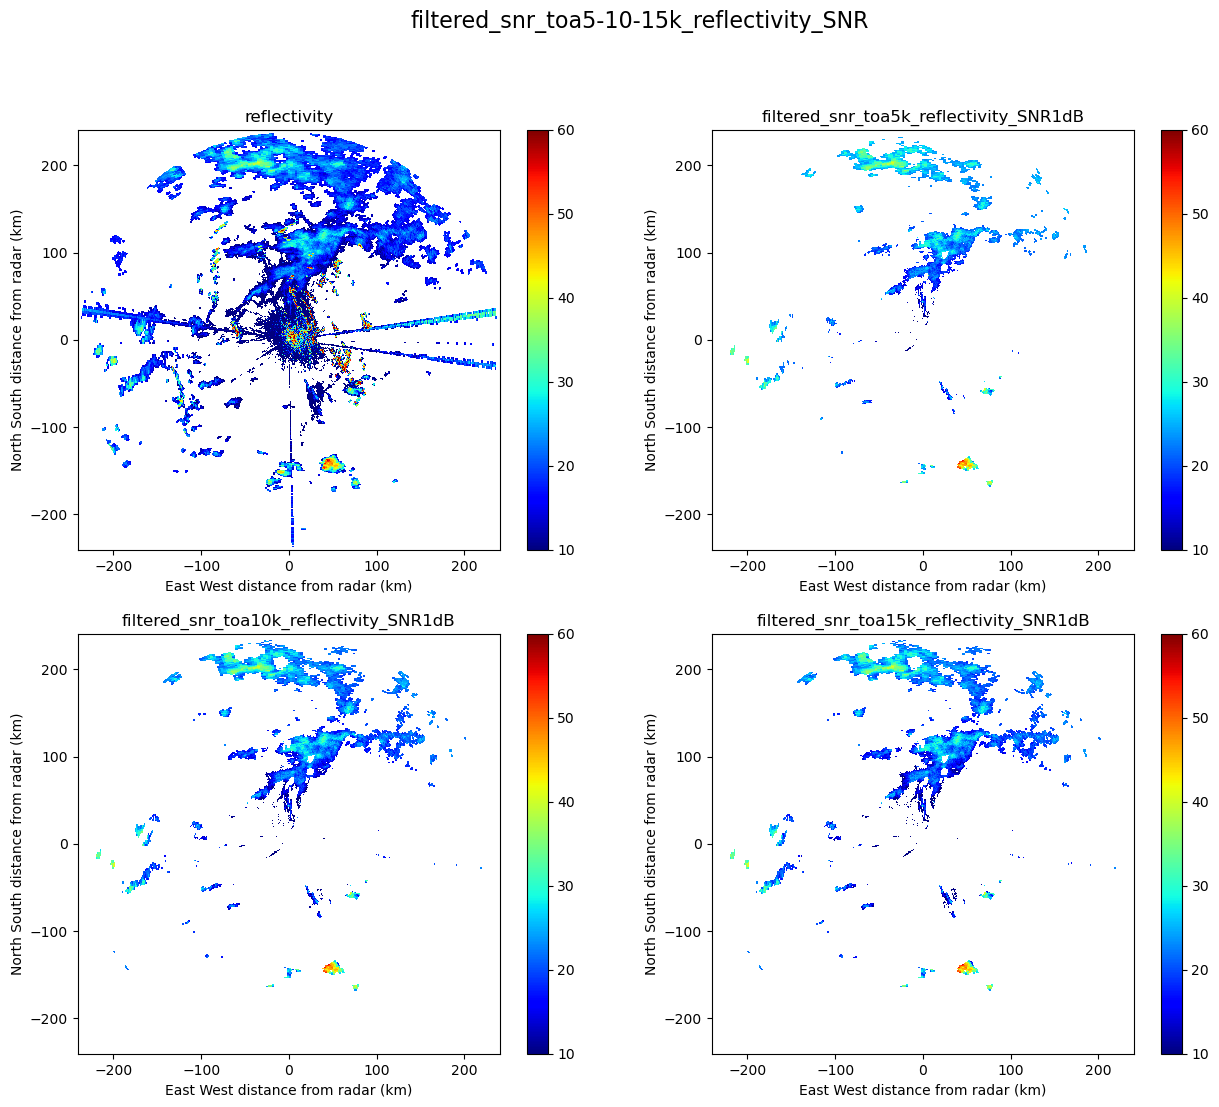

In [13]:
# create the plot
sweep=0

fig = plt.figure(figsize=(15, 12))
ax1 = fig.add_subplot(221)
display = pyart.graph.RadarDisplay(radar)
display.plot_ppi('reflectivity', sweep, ax=ax1, vmin=10, vmax=60., 
                 colorbar_label='', cmap='jet',
                 title='reflectivity')
             
ax2 = fig.add_subplot(222)
display = pyart.graph.RadarDisplay(radar)
display.plot_ppi('filtered_snr_toa5k_reflectivity_SNR1dB', sweep, ax=ax2, vmin=10, vmax=60., 
                 colorbar_label='', cmap='jet',
                 title='filtered_snr_toa5k_reflectivity_SNR1dB')

ax3 = fig.add_subplot(223)
display = pyart.graph.RadarDisplay(radar)
display.plot_ppi('filtered_snr_toa10k_reflectivity_SNR1dB', sweep, ax=ax3, vmin=10, vmax=60., 
                 colorbar_label='', cmap='jet',
                 title='filtered_snr_toa10k_reflectivity_SNR1dB')

ax4 = fig.add_subplot(224)
display = pyart.graph.RadarDisplay(radar)
display.plot_ppi('filtered_snr_toa15k_reflectivity_SNR1dB', sweep, ax=ax4, vmin=10, vmax=60., 
                 colorbar_label='', cmap='jet',
                 title='filtered_snr_toa15k_reflectivity_SNR1dB')

plt.suptitle('filtered_snr_toa5-10-15k_reflectivity_SNR', fontsize=16)
plt.show()

#### Sweep 2 TOA แต่ละระดับ SNR1dB

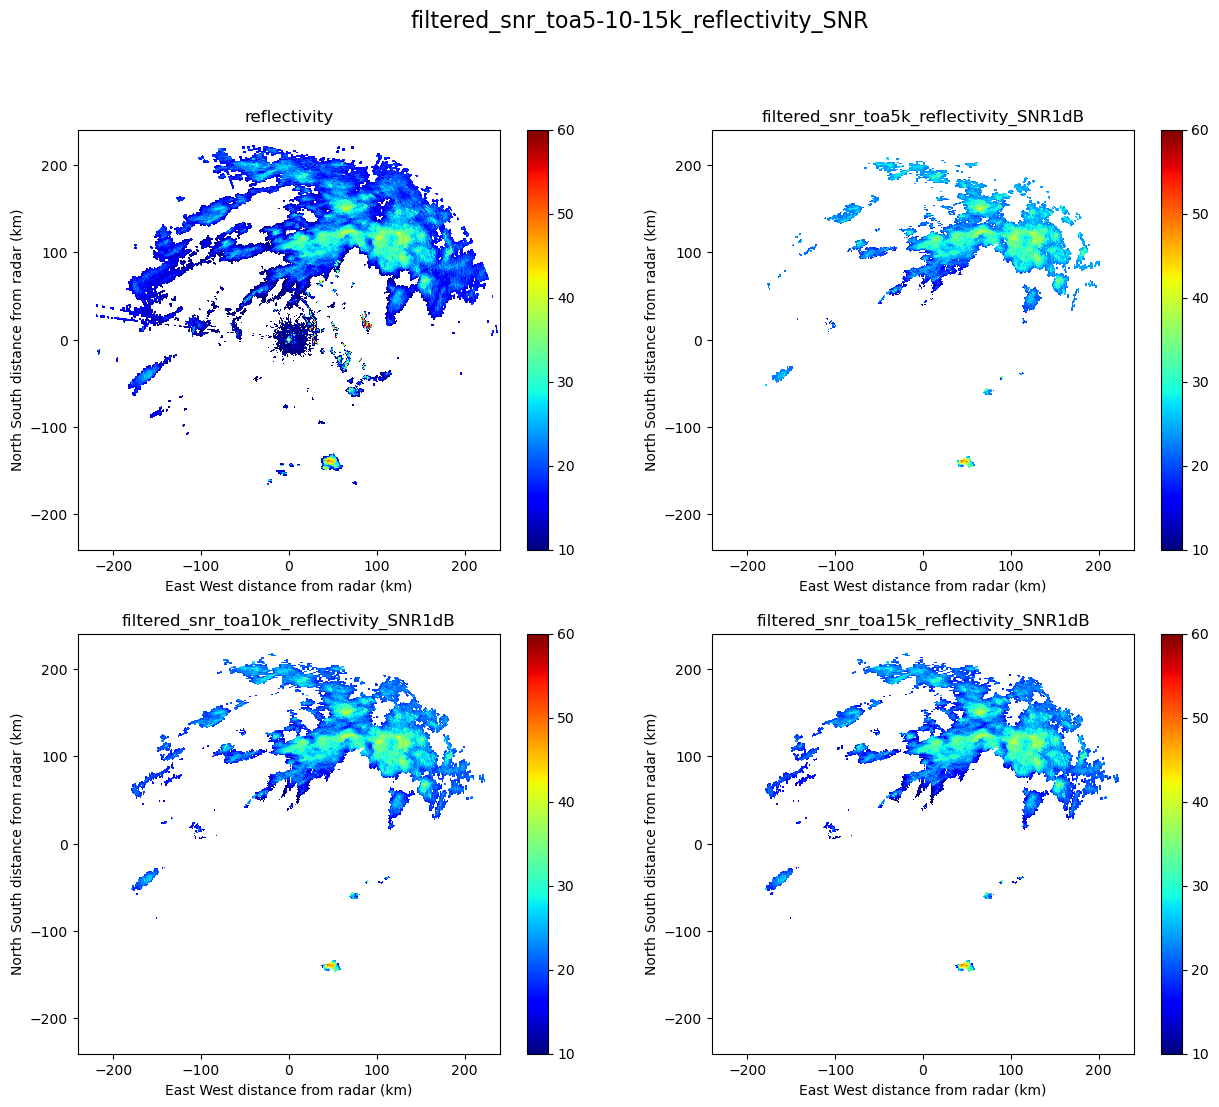

In [14]:
# create the plot
sweep=1

fig = plt.figure(figsize=(15, 12))
ax1 = fig.add_subplot(221)
display = pyart.graph.RadarDisplay(radar)
display.plot_ppi('reflectivity', sweep, ax=ax1, vmin=10, vmax=60., 
                 colorbar_label='', cmap='jet',
                 title='reflectivity')
             
ax2 = fig.add_subplot(222)
display = pyart.graph.RadarDisplay(radar)
display.plot_ppi('filtered_snr_toa5k_reflectivity_SNR1dB', sweep, ax=ax2, vmin=10, vmax=60., 
                 colorbar_label='', cmap='jet',
                 title='filtered_snr_toa5k_reflectivity_SNR1dB')

ax3 = fig.add_subplot(223)
display = pyart.graph.RadarDisplay(radar)
display.plot_ppi('filtered_snr_toa10k_reflectivity_SNR1dB', sweep, ax=ax3, vmin=10, vmax=60., 
                 colorbar_label='', cmap='jet',
                 title='filtered_snr_toa10k_reflectivity_SNR1dB')

ax4 = fig.add_subplot(224)
display = pyart.graph.RadarDisplay(radar)
display.plot_ppi('filtered_snr_toa15k_reflectivity_SNR1dB', sweep, ax=ax4, vmin=10, vmax=60., 
                 colorbar_label='', cmap='jet',
                 title='filtered_snr_toa15k_reflectivity_SNR1dB')

plt.suptitle('filtered_snr_toa5-10-15k_reflectivity_SNR', fontsize=16)
plt.show()

### Gridding CAPPI

In [15]:
print(radar.fields.keys())

dict_keys(['reflectivity', 'velocity', 'spectrum_width', 'corrected_reflectivity', 'corrected_differential_reflectivity', 'differential_phase', 'cross_correlation_ratio', 'signal_to_noise_ratio_5k', 'signal_to_noise_ratio_10k', 'signal_to_noise_ratio_15k', 'signal_to_noise_ratio_16k', 'signal_to_noise_ratio_17k', 'reflectivity_copy', 'filtered_snr_toa5k_reflectivity_SNR1dB', 'reflectivity_copy2dB', 'filtered_snr_toa5k_reflectivity_SNR2dB', 'reflectivity_copy3dB', 'filtered_snr_toa5k_reflectivity_SNR3dB', 'reflectivity_copy4dB', 'filtered_snr_toa5k_reflectivity_SNR4dB', 'reflectivity_copy5dB', 'filtered_snr_toa5k_reflectivity_SNR5dB', 'reflectivity_copy_10k1dB', 'filtered_snr_toa10k_reflectivity_SNR1dB', 'reflectivity_copy_15k1dB', 'filtered_snr_toa15k_reflectivity_SNR1dB'])


In [16]:
radar.latitude['data'][0]

16.775407986111112

In [17]:
#radar_p=radar.extract_sweeps([0]) # เลือกมุมยก 0 คือ มุมแรก
lat_0 = radar.latitude['data'][0]
lon_0 = radar.longitude['data'][0]

shape = (11, 241, 241)
grid = pyart.map.grid_from_radars(
            radar,
            #gatefilter=gtfilter,
            grid_shape=shape, #Number of points in the grid (z, y, x)
            grid_limits=((0, 10000), (-240000, 240000), (-240000, 240000)),    # ตั้งค่า(2000, 2000) หมายความว่าต้องการให้สร้างกริด cappi ที่ระดับ 2 km จาก ppi ดังกล่าว
            grid_origin = (lat_0,lon_0),
            fields=['reflectivity','filtered_snr_toa10k_reflectivity_SNR1dB']#,
            #roi_func= 'constant', constant_roi=4000.0 # เปลี่ยนฟังก์ชั่นเป็น roi_func= 'constant' เพื่อต้องการให้ดึงขัอมูลจุดของมุม ppi ที่อยู่ในระดับสูงมาคิดน้ำหนักด้วย สังเกตตรงกลางสถานีจะมีค่าฝนแล้ว
)

#### cappi 2 km

C:\Users\User\miniconda3\envs\ml_dl_n1\lib\site-packages\pyart\graph\gridmapdisplay.py:213: UserWarning: No projection was defined for the axes. Overridding defined axes and using default axes with projection Mercator.
  warnings.warn(


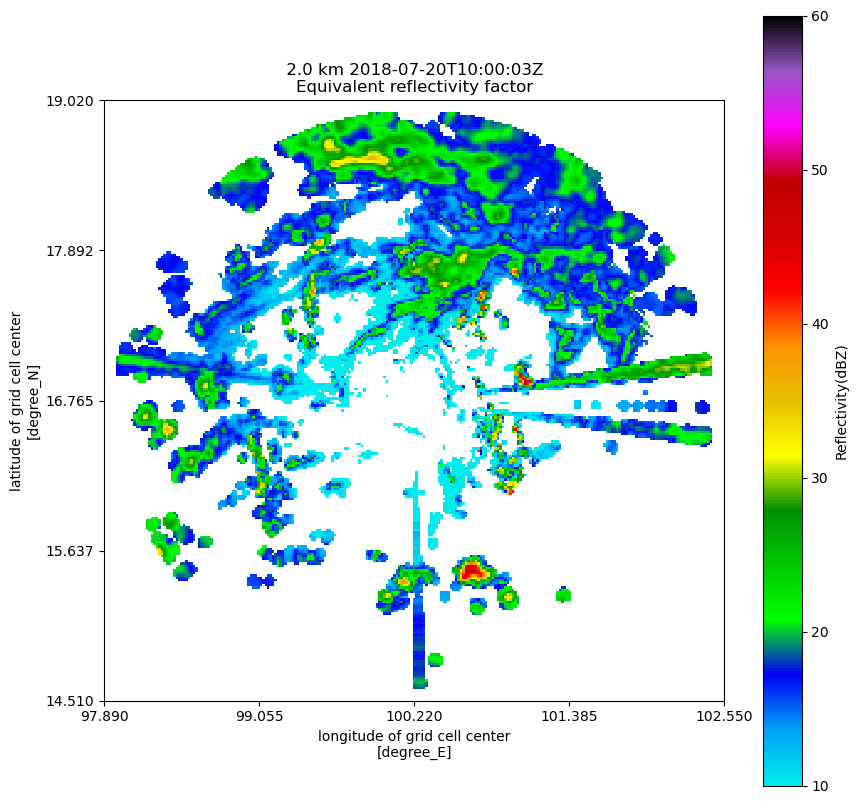

In [18]:
fig = plt.figure(figsize=[10, 10])
display = pyart.graph.GridMapDisplay(grid)
display.plot_grid("reflectivity", level=2, cmap=pyart.graph.cm.NWSRef, vmin=10, vmax=60)

C:\Users\User\miniconda3\envs\ml_dl_n1\lib\site-packages\pyart\graph\gridmapdisplay.py:213: UserWarning: No projection was defined for the axes. Overridding defined axes and using default axes with projection Mercator.
  warnings.warn(


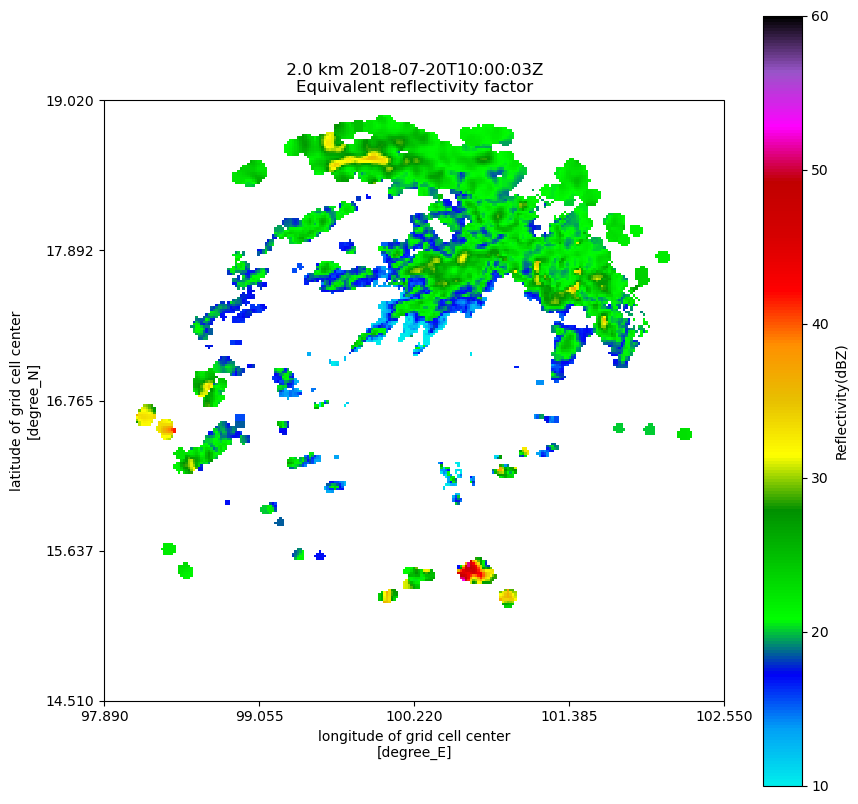

In [19]:
fig = plt.figure(figsize=[10, 10])
display = pyart.graph.GridMapDisplay(grid)
display.plot_grid("filtered_snr_toa10k_reflectivity_SNR1dB", level=2, cmap=pyart.graph.cm.NWSRef, vmin=10, vmax=60)

#### cappi 1 km / 3/4/5

C:\Users\User\miniconda3\envs\ml_dl_n1\lib\site-packages\pyart\graph\gridmapdisplay.py:213: UserWarning: No projection was defined for the axes. Overridding defined axes and using default axes with projection Mercator.
  warnings.warn(


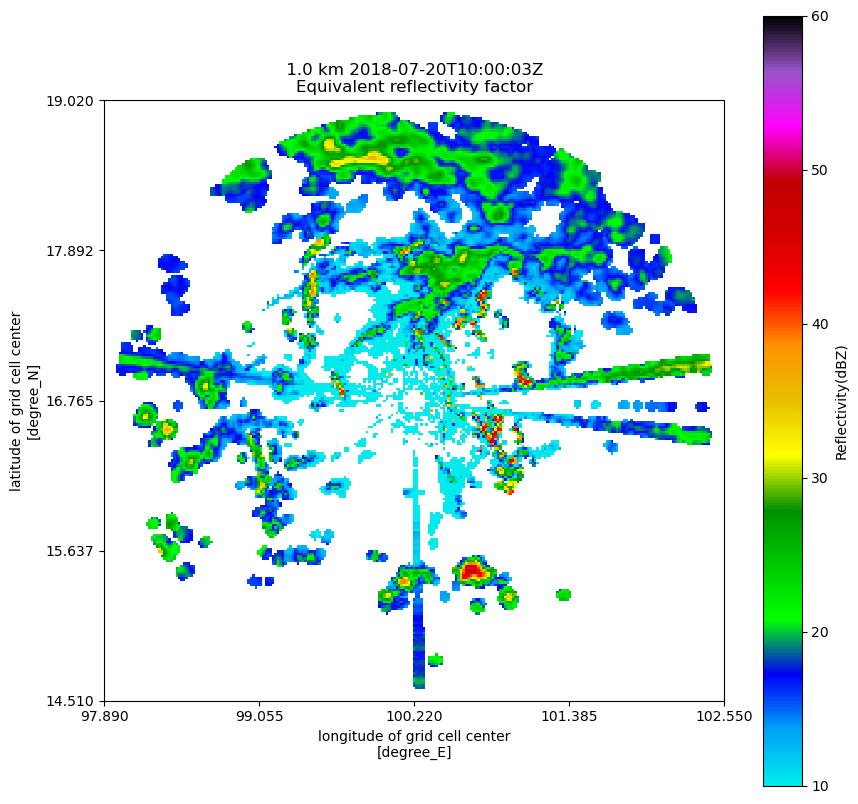

In [20]:
fig = plt.figure(figsize=[10, 10])
display = pyart.graph.GridMapDisplay(grid)
display.plot_grid("reflectivity", level=1, cmap=pyart.graph.cm.NWSRef, vmin=10, vmax=60)

C:\Users\User\miniconda3\envs\ml_dl_n1\lib\site-packages\pyart\graph\gridmapdisplay.py:213: UserWarning: No projection was defined for the axes. Overridding defined axes and using default axes with projection Mercator.
  warnings.warn(


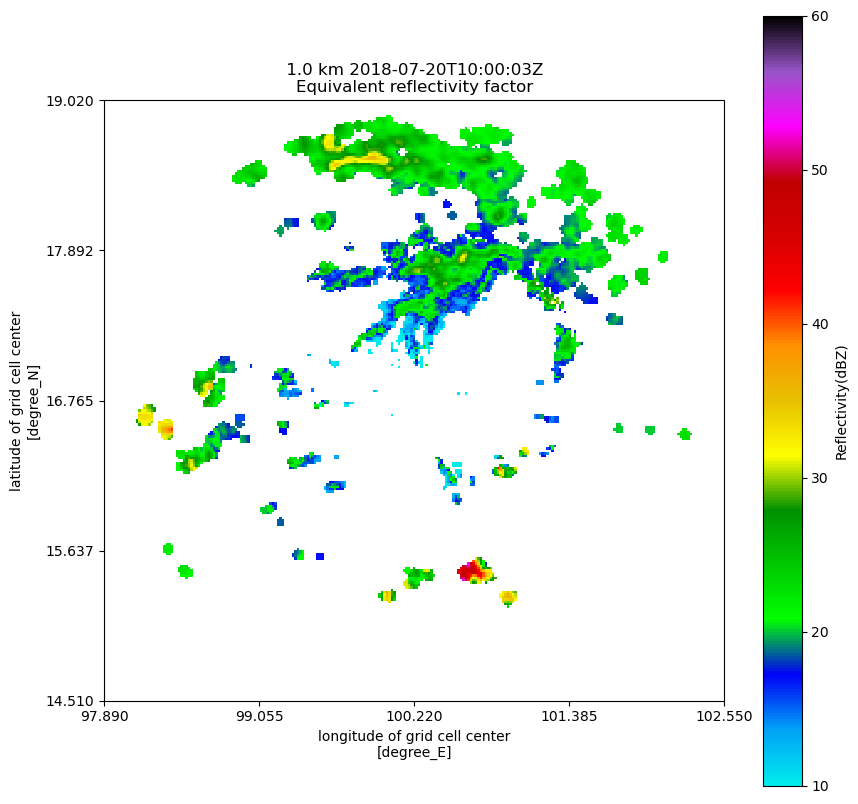

In [21]:
fig = plt.figure(figsize=[10, 10])
display = pyart.graph.GridMapDisplay(grid)
display.plot_grid("filtered_snr_toa10k_reflectivity_SNR1dB", level=1, cmap=pyart.graph.cm.NWSRef, vmin=10, vmax=60)